In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("../../Data/Chen_Analysis/summary.tsv", sep="\t")
df.head()

,file,format,type,num_seqs,sum_len,min_len,avg_len,max_len,Q1,Q2,Q3,sum_gap,N50,N50_num,Q20(%),Q30(%),AvgQual,GC(%),sum_n
0,GOMC.bin.10042,FASTA,DNA,626,2319874,1500,3705.9,53601,1992,2694,4188,0,4207,154,0,0,0.0,34.47,0
1,GOMC.bin.10056,FASTA,DNA,443,6354761,1539,14344.8,95762,4378,10355,19702,0,23444,89,0,0,0.0,60.04,0
2,GOMC.bin.10095,FASTA,DNA,535,6605093,1532,12346.0,96255,3736,8361,15912,0,19853,101,0,0,0.0,49.53,0
3,GOMC.bin.10114,FASTA,DNA,963,2772335,1503,2878.9,11546,1952,2459,3384,0,2995,303,0,0,0.0,51.36,0
4,GOMC.bin.10140,FASTA,DNA,216,1294251,1646,5991.9,23210,3186,4772,7956,0,7441,57,0,0,0.0,56.65,0


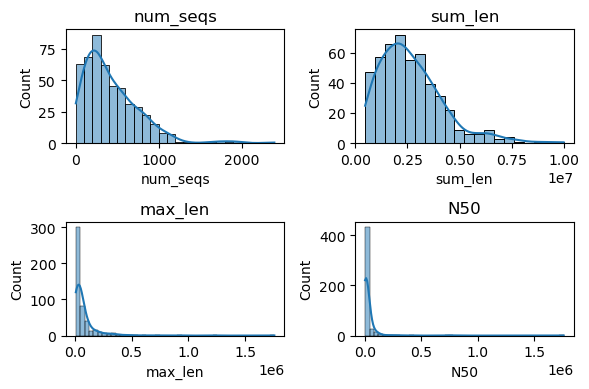

In [ ]:
cols = ["num_seqs", "sum_len", "max_len", "N50"]

plt.figure(figsize=(6,4))
for i, col in enumerate(cols, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[col], kde=True)
    plt.title(col)

plt.tight_layout()
plt.savefig("../../Data/Chen_Analysis/Reports/dist.png")

In [11]:
pd.set_option('display.float_format', '{:.0f}'.format)

for col in cols:
    print(df[col].describe())

count    489
mean     427
std      332
min        3
25%      191
50%      342
75%      595
max     2387
Name: num_seqs, dtype: float64
count       489
mean    2677754
std     1538554
min      471786
25%     1571857
50%     2412340
75%     3472026
max     9971616
Name: sum_len, dtype: float64
count       489
mean      75099
std      133321
min        7811
25%       20385
50%       36176
75%       74124
max     1757649
Name: max_len, dtype: float64
count       489
mean      27089
std       98610
min        2071
25%        4363
50%        7890
75%       18483
max     1757649
Name: N50, dtype: float64


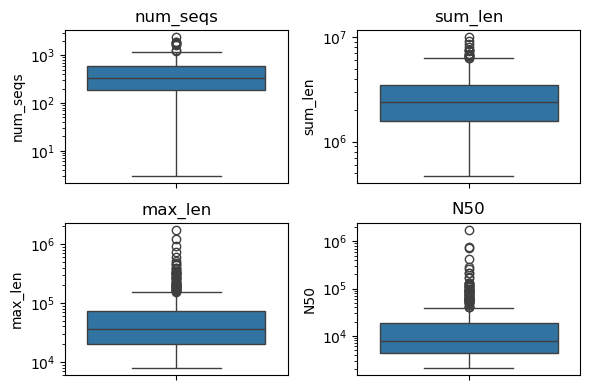

In [ ]:
plt.figure(figsize=(6, 4))
for i, col in enumerate(cols, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(y=df[col])
    plt.yscale('log')
    plt.title(col)

plt.tight_layout()
plt.savefig("../../Data/Chen_Analysis/Reports/boxplot.png")

In [23]:
num_seq = df["num_seqs"]

q1 = num_seq.quantile(0.25)
q3 = num_seq.quantile(0.75)
iqr = q3 - q1
supl = q3 + 1.5 * iqr

df_iqr = df[num_seq <= supl]
df_iqr["num_seqs"].describe()

count    480
mean     402
std      278
min        3
25%      190
50%      336
75%      578
max     1175
Name: num_seqs, dtype: float64

In [ ]:
df_iqr.to_csv('../../Data/Chen_Analysis/summary_iqr.csv', index=False)